Importing the Dependencies

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

Data Collection & Pre-Processing

In [157]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_excel('./final_2.xlsx')

# Remove \n and \r from the 'Message' column
raw_mail_data['Message'] = raw_mail_data['Message'].str.replace('\n', ' ').str.replace('\r', ' ')

In [158]:
print(raw_mail_data)

       Category                                            Message
0    Legitimate   in an effort to better organize the activitie...
1          Spam  hi , we sent you an email a while ago , becaus...
2          Spam  enjoy lowpriced m = eds as our customer rx med...
3    Legitimate   attached is a updated memo about transition i...
4          Spam  searching for best adult datlng slte ? click h...
..          ...                                                ...
995  Legitimate   here are the cashout entries for 7 / 00 and 8...
996  Legitimate   Hamza , please see eog ' s july nomination . ...
997  Legitimate   hi guys ,_x000D_ please take a look at the fo...
998        Spam   hello , i sent you an email a few days ago be...
999        Spam   cheap prices on valium * * * get your medicat...

[1000 rows x 2 columns]


In [159]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [160]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,Legitimate,in an effort to better organize the activitie...
1,Spam,"hi , we sent you an email a while ago , becaus..."
2,Spam,enjoy lowpriced m = eds as our customer rx med...
3,Legitimate,attached is a updated memo about transition i...
4,Spam,searching for best adult datlng slte ? click h...


In [161]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(1000, 2)

In [162]:
# label Spam mail as 0;  Legitimate mail as 1;

mail_data.loc[mail_data['Category'] == 'Spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'Legitimate', 'Category',] = 1

Spam  -  0

Legitimate  -  1

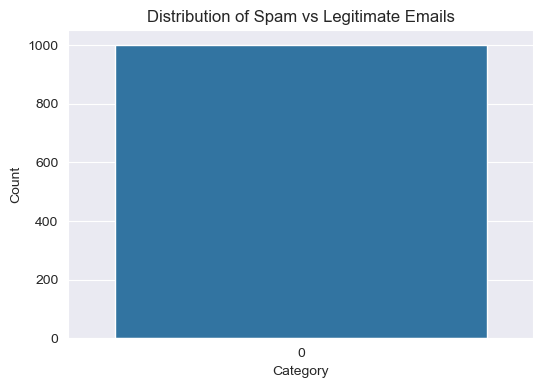

In [163]:
# Visualize the distribution of Spam vs Legitimate emails
plt.figure(figsize=(6,4))
sns.countplot(mail_data['Category'])
plt.title('Distribution of Spam vs Legitimate Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [164]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [165]:
print(X)

0       in an effort to better organize the activitie...
1      hi , we sent you an email a while ago , becaus...
2      enjoy lowpriced m = eds as our customer rx med...
3       attached is a updated memo about transition i...
4      searching for best adult datlng slte ? click h...
                             ...                        
995     here are the cashout entries for 7 / 00 and 8...
996     Hamza , please see eog ' s july nomination . ...
997     hi guys ,_x000D_ please take a look at the fo...
998     hello , i sent you an email a few days ago be...
999     cheap prices on valium * * * get your medicat...
Name: Message, Length: 1000, dtype: object


In [166]:
print(Y)

0      1
1      0
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    0
Name: Category, Length: 1000, dtype: object


Splitting the data into training data & test data

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [168]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1000,)
(800,)
(200,)


Feature Extraction

In [169]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [170]:
print(X_train)

78      no deal for march or april 2000 . . . . . . ....
109     aqtdaibnuf jmxdzjdyjskm noyrhrcsltyiyc yfcgqh...
201     let ' s face it , age should be nothing more ...
465     i may need more assiAlice on this issue . i t...
143    off . shorejph . armacy - dishnow 4 openhto 3 ...
                             ...                        
952     is this date really june of 1999 ? hopefully ...
643     sorry i ' m just now getting back to you . he...
249      we are starting to collect data for april . ...
664     Hamza , go ahead and aept the nom revision . ...
874     this is a great dating site ! ! ! please remo...
Name: Message, Length: 800, dtype: object


In [171]:
print(X_train_features)

  (0, 4130)	0.17631892865780707
  (0, 16208)	0.08104210762523949
  (0, 1162)	0.17970997214395604
  (0, 8055)	0.08453974762029041
  (0, 12530)	0.20918333428036515
  (0, 14822)	0.14030271892847127
  (0, 8066)	0.18844820293965217
  (0, 4357)	0.20918333428036515
  (0, 11292)	0.09846084313084591
  (0, 13861)	0.164189654375962
  (0, 940)	0.20918333428036515
  (0, 5594)	0.19705405999852005
  (0, 4994)	0.11114928268655383
  (0, 327)	0.19705405999852005
  (0, 7461)	0.15318936204703168
  (0, 5565)	0.09883245624704531
  (0, 82)	0.11604417036478111
  (0, 1220)	0.20918333428036515
  (0, 2476)	0.20918333428036515
  (0, 5755)	0.3815776633125919
  (0, 7701)	0.14890857598733914
  (0, 507)	0.20918333428036515
  (0, 16433)	0.12110199936328414
  (0, 9352)	0.18844820293965217
  (0, 7699)	0.12624280891751324
  :	:
  (799, 3429)	0.12336097845977179
  (799, 3105)	0.12336097845977179
  (799, 14606)	0.12336097845977179
  (799, 11732)	0.12336097845977179
  (799, 3844)	0.12336097845977179
  (799, 17126)	0.1179734

Training the Model

Logistic Regression

In [172]:
model = LogisticRegression()

In [173]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

Prediction on Training data

In [174]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
precision_on_training_data = precision_score(Y_train, prediction_on_training_data)
recall_on_training_data = recall_score(Y_train, prediction_on_training_data)
f1_on_training_data = f1_score(Y_train, prediction_on_training_data)

In [175]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.99125


In [176]:
print('Precision on training data:', precision_on_training_data)

Precision on training data: 0.9974619289340102


In [177]:
print('Recall on training data:', recall_on_training_data)

Recall on training data: 0.9849624060150376


print('F1-score on training data:', f1_on_training_data)

Prediction on Test data

In [178]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
precision_on_test_data = precision_score(Y_test, prediction_on_test_data)
recall_on_test_data = recall_score(Y_test, prediction_on_test_data)
f1_on_test_data = f1_score(Y_test, prediction_on_test_data)

In [179]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.96


In [180]:
print('Precision on test data:', precision_on_test_data)

Precision on test data: 0.9894736842105263


In [181]:
print('Recall on test data:', recall_on_test_data)

Recall on test data: 0.9306930693069307


In [182]:
print('F1-score on test data:', f1_on_test_data)

F1-score on test data: 0.9591836734693878


Confusion Matrix

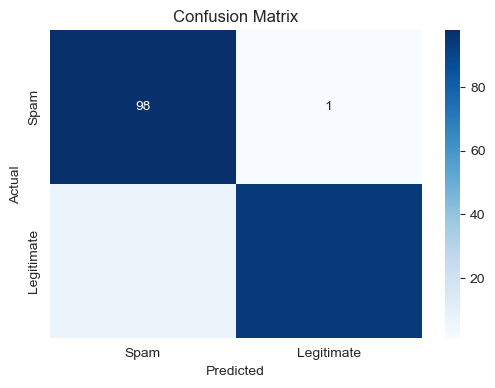

In [183]:
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Legitimate'], yticklabels=['Spam', 'Legitimate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve

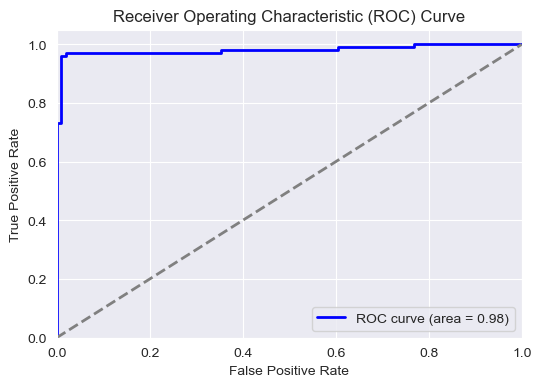

In [184]:
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test_features)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Building a Predictive System

In [185]:
input_mail = ["Hi Sahil ?, Welcome back to Spotify. To complete your login, select the button below on your mobile device. This link is valid for 4 hours. GO TO SPOTIFY	 This link also confirms your email associated with your aount. If you didn’t try to log in to your aount or request this email, don’t worry, your email address may have been entered by mistake. You can simply ignore or delete this email, and use your existing password to log in. Happy listening, The Spotify team "]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Legitimate mail')

else:
  print('Spam mail')

[1]
Legitimate mail


In [186]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(model, 'saved_model.pkl')

# Save the TfidfVectorizer
joblib.dump(feature_extraction, 'vectorizer.pkl')

['vectorizer.pkl']